In [1]:
### Imports (TODO remove this when finished)
%load_ext autoreload
%autoreload 2

# Append root folder in case you haven't installed NIDN
import sys
sys.path.append("../")

import nidn

04:42:29|NIDN-INFO| Initialized NIDN for cpu
04:42:29|NIDN-INFO| Using double precision


### Define filter target

Physical wavelengths are (in meters):
[1.00000000e-05 7.75000000e-06 6.32653061e-06 5.34482759e-06
 4.62686567e-06 4.07894737e-06 3.64705882e-06 3.29787234e-06
 3.00970874e-06 2.76785714e-06 2.56198347e-06 2.38461538e-06
 2.23021583e-06 2.09459459e-06 1.97452229e-06 1.86746988e-06
 1.77142857e-06 1.68478261e-06 1.60621762e-06 1.53465347e-06
 1.46919431e-06 1.40909091e-06 1.35371179e-06 1.30252101e-06
 1.25506073e-06 1.21093750e-06 1.16981132e-06 1.13138686e-06
 1.09540636e-06 1.06164384e-06 1.02990033e-06 1.00000000e-06]


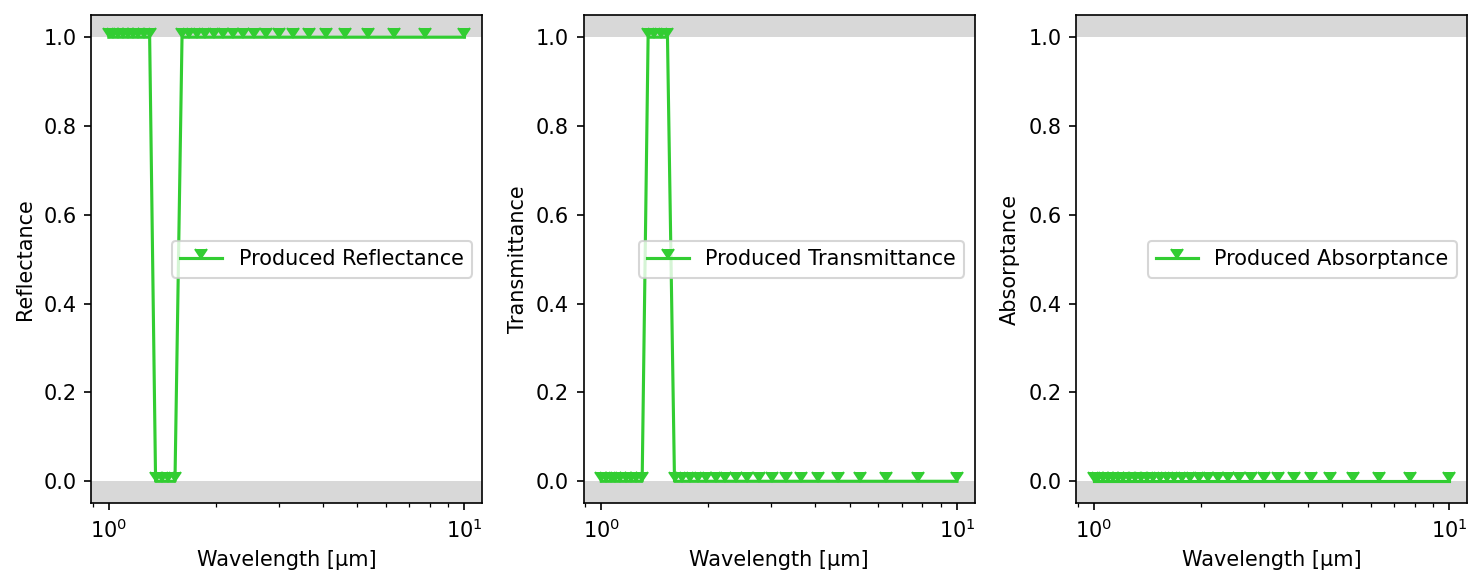

In [5]:
cfg = nidn.load_default_cfg() # Load default cfg as starting point


# 1550 Filter
cfg.target_reflectance_spectrum =   19*[1.0] + 4*[0.0] + 9*[1.0]
cfg.target_transmittance_spectrum = 19*[0.0] + 4*[1.0] + 9*[0.0]
cfg.TRCWA_PER_LAYER_THICKNESS = [1.]
cfg.TRCWA_L_grid = [[1.0,0.0],[0.0,1.0]]
cfg.physical_wavelength_range[0] = 1e-6
cfg.physical_wavelength_range[1] = 1e-5
cfg.freq_distribution = "linear"

cfg.siren_omega = 1.

cfg.N_freq = 32

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

physical_wls, normalized_freqs = nidn.get_frequency_points(cfg)
print("Physical wavelengths are (in meters):")
print(physical_wls)

In [6]:
cfg.pop("model",None); # Forget the old model

cfg.Nx = 1 # Set layer size  to 1x1 (interpreted as uniform)
cfg.Ny = 1
cfg.eps_oversampling = 1
cfg.learning_rate = 8e-5
cfg.N_layers = 10 # Choose number of layers

# Allowed range of epsilon values
cfg.real_min_eps = 0.0
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 1.0

cfg.type = "regression" # Choose type as described above
cfg.iterations = 10000 # Set number of training iterations (that is forward model evaluations) to perform

In [11]:
nidn.run_training(cfg);

08:15:04|NIDN-INFO| ###  New Best=0.0575 with SpectrumLoss=0.0575 ### L1=0.0575
08:15:04|NIDN-INFO| It=0     Loss=0.0575   |  weighted_avg=0.0575  |  SpectrumLoss=0.0575 | L1=0.0575
08:15:08|NIDN-INFO| It=5     Loss=0.1007   |  weighted_avg=0.1017  |  SpectrumLoss=0.1007 | L1=0.1007
08:15:12|NIDN-INFO| It=10    Loss=0.0829   |  weighted_avg=0.1040  |  SpectrumLoss=0.0829 | L1=0.0829
08:15:16|NIDN-INFO| It=15    Loss=0.1128   |  weighted_avg=0.0966  |  SpectrumLoss=0.1128 | L1=0.1128
08:15:19|NIDN-INFO| It=20    Loss=0.0856   |  weighted_avg=0.0972  |  SpectrumLoss=0.0856 | L1=0.0856
08:15:23|NIDN-INFO| It=25    Loss=0.0982   |  weighted_avg=0.0905  |  SpectrumLoss=0.0982 | L1=0.0982
08:15:27|NIDN-INFO| It=30    Loss=0.0752   |  weighted_avg=0.0825  |  SpectrumLoss=0.0752 | L1=0.0752
08:15:31|NIDN-INFO| It=35    Loss=0.0677   |  weighted_avg=0.0797  |  SpectrumLoss=0.0677 | L1=0.0677
08:15:35|NIDN-INFO| It=40    Loss=0.0796   |  weighted_avg=0.0746  |  SpectrumLoss=0.0796 | L1=0.0796
08

08:17:26|NIDN-INFO| ###  New Best=0.0573 with SpectrumLoss=0.0573 ### L1=0.0573
08:17:27|NIDN-INFO| ###  New Best=0.0573 with SpectrumLoss=0.0573 ### L1=0.0573
08:17:28|NIDN-INFO| ###  New Best=0.0573 with SpectrumLoss=0.0573 ### L1=0.0573
08:17:28|NIDN-INFO| It=185   Loss=0.0573   |  weighted_avg=0.0573  |  SpectrumLoss=0.0573 | L1=0.0573
08:17:29|NIDN-INFO| ###  New Best=0.0572 with SpectrumLoss=0.0572 ### L1=0.0572
08:17:30|NIDN-INFO| ###  New Best=0.0572 with SpectrumLoss=0.0572 ### L1=0.0572
08:17:30|NIDN-INFO| ###  New Best=0.0572 with SpectrumLoss=0.0572 ### L1=0.0572
08:17:31|NIDN-INFO| ###  New Best=0.0572 with SpectrumLoss=0.0572 ### L1=0.0572
08:17:32|NIDN-INFO| ###  New Best=0.0572 with SpectrumLoss=0.0572 ### L1=0.0572
08:17:32|NIDN-INFO| It=190   Loss=0.0572   |  weighted_avg=0.0573  |  SpectrumLoss=0.0572 | L1=0.0572
08:17:33|NIDN-INFO| ###  New Best=0.0572 with SpectrumLoss=0.0572 ### L1=0.0572
08:17:34|NIDN-INFO| ###  New Best=0.0572 with SpectrumLoss=0.0572 ### L1=0.0

08:18:15|NIDN-INFO| It=245   Loss=0.0570   |  weighted_avg=0.0570  |  SpectrumLoss=0.0570 | L1=0.0570
08:18:16|NIDN-INFO| ###  New Best=0.0570 with SpectrumLoss=0.0570 ### L1=0.0570
08:18:16|NIDN-INFO| ###  New Best=0.0570 with SpectrumLoss=0.0570 ### L1=0.0570
08:18:17|NIDN-INFO| ###  New Best=0.0570 with SpectrumLoss=0.0570 ### L1=0.0570
08:18:18|NIDN-INFO| ###  New Best=0.0570 with SpectrumLoss=0.0570 ### L1=0.0570
08:18:19|NIDN-INFO| ###  New Best=0.0570 with SpectrumLoss=0.0570 ### L1=0.0570
08:18:19|NIDN-INFO| It=250   Loss=0.0570   |  weighted_avg=0.0570  |  SpectrumLoss=0.0570 | L1=0.0570
08:18:19|NIDN-INFO| ###  New Best=0.0570 with SpectrumLoss=0.0570 ### L1=0.0570
08:18:20|NIDN-INFO| ###  New Best=0.0570 with SpectrumLoss=0.0570 ### L1=0.0570
08:18:21|NIDN-INFO| ###  New Best=0.0570 with SpectrumLoss=0.0570 ### L1=0.0570
08:18:22|NIDN-INFO| ###  New Best=0.0570 with SpectrumLoss=0.0570 ### L1=0.0570
08:18:23|NIDN-INFO| ###  New Best=0.0570 with SpectrumLoss=0.0570 ### L1=0.0

08:19:04|NIDN-INFO| ###  New Best=0.0569 with SpectrumLoss=0.0569 ### L1=0.0569
08:19:05|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:06|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:06|NIDN-INFO| It=310   Loss=0.0568   |  weighted_avg=0.0569  |  SpectrumLoss=0.0568 | L1=0.0568
08:19:06|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:07|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:08|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:09|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:09|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:09|NIDN-INFO| It=315   Loss=0.0568   |  weighted_avg=0.0569  |  SpectrumLoss=0.0568 | L1=0.0568
08:19:10|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:11|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0

08:19:52|NIDN-INFO| It=370   Loss=0.0568   |  weighted_avg=0.0568  |  SpectrumLoss=0.0568 | L1=0.0568
08:19:53|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:54|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:55|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:56|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:56|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:56|NIDN-INFO| It=375   Loss=0.0568   |  weighted_avg=0.0568  |  SpectrumLoss=0.0568 | L1=0.0568
08:19:57|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:58|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:59|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:19:59|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0568
08:20:00|NIDN-INFO| ###  New Best=0.0568 with SpectrumLoss=0.0568 ### L1=0.0

08:20:41|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:20:42|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:20:43|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:20:43|NIDN-INFO| It=435   Loss=0.0567   |  weighted_avg=0.0567  |  SpectrumLoss=0.0567 | L1=0.0567
08:20:44|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:20:45|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:20:45|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:20:46|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:20:47|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:20:47|NIDN-INFO| It=440   Loss=0.0567   |  weighted_avg=0.0567  |  SpectrumLoss=0.0567 | L1=0.0567
08:20:48|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:20:48|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0

08:21:30|NIDN-INFO| It=495   Loss=0.0567   |  weighted_avg=0.0567  |  SpectrumLoss=0.0567 | L1=0.0567
08:21:31|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:21:31|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:21:32|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:21:33|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:21:34|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:21:34|NIDN-INFO| It=500   Loss=0.0567   |  weighted_avg=0.0567  |  SpectrumLoss=0.0567 | L1=0.0567
08:21:35|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:21:35|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:21:36|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:21:37|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0567
08:21:38|NIDN-INFO| ###  New Best=0.0567 with SpectrumLoss=0.0567 ### L1=0.0

08:22:19|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:22:20|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:22:21|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:22:21|NIDN-INFO| It=560   Loss=0.0566   |  weighted_avg=0.0566  |  SpectrumLoss=0.0566 | L1=0.0566
08:22:21|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:22:22|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:22:23|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:22:24|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:22:24|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:22:24|NIDN-INFO| It=565   Loss=0.0566   |  weighted_avg=0.0566  |  SpectrumLoss=0.0566 | L1=0.0566
08:22:25|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:22:26|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0

08:23:08|NIDN-INFO| It=620   Loss=0.0566   |  weighted_avg=0.0566  |  SpectrumLoss=0.0566 | L1=0.0566
08:23:09|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:23:10|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:23:11|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:23:12|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:23:12|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:23:12|NIDN-INFO| It=625   Loss=0.0566   |  weighted_avg=0.0566  |  SpectrumLoss=0.0566 | L1=0.0566
08:23:13|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:23:14|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:23:15|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:23:16|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:23:16|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0

08:23:59|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:24:00|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:24:01|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:24:01|NIDN-INFO| It=685   Loss=0.0566   |  weighted_avg=0.0566  |  SpectrumLoss=0.0566 | L1=0.0566
08:24:01|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:24:02|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:24:03|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:24:04|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:24:05|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:24:05|NIDN-INFO| It=690   Loss=0.0566   |  weighted_avg=0.0566  |  SpectrumLoss=0.0566 | L1=0.0566
08:24:05|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0566
08:24:06|NIDN-INFO| ###  New Best=0.0566 with SpectrumLoss=0.0566 ### L1=0.0

08:24:48|NIDN-INFO| It=745   Loss=0.0565   |  weighted_avg=0.0565  |  SpectrumLoss=0.0565 | L1=0.0565
08:24:49|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0565
08:24:50|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0565
08:24:51|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0565
08:24:52|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0565
08:24:52|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0565
08:24:52|NIDN-INFO| It=750   Loss=0.0565   |  weighted_avg=0.0565  |  SpectrumLoss=0.0565 | L1=0.0565
08:24:53|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0565
08:24:54|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0565
08:24:55|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0565
08:24:56|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0565
08:24:56|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0

08:25:38|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0565
08:25:40|NIDN-INFO| It=810   Loss=0.0565   |  weighted_avg=0.0565  |  SpectrumLoss=0.0565 | L1=0.0565
08:25:43|NIDN-INFO| It=815   Loss=0.0566   |  weighted_avg=0.0565  |  SpectrumLoss=0.0566 | L1=0.0566
08:25:47|NIDN-INFO| It=820   Loss=0.0572   |  weighted_avg=0.0566  |  SpectrumLoss=0.0572 | L1=0.0572
08:25:51|NIDN-INFO| It=825   Loss=0.0565   |  weighted_avg=0.0567  |  SpectrumLoss=0.0565 | L1=0.0565
08:25:52|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0565
08:25:55|NIDN-INFO| It=830   Loss=0.0568   |  weighted_avg=0.0568  |  SpectrumLoss=0.0568 | L1=0.0568
08:25:58|NIDN-INFO| ###  New Best=0.0565 with SpectrumLoss=0.0565 ### L1=0.0565
08:25:59|NIDN-INFO| It=835   Loss=0.0565   |  weighted_avg=0.0568  |  SpectrumLoss=0.0565 | L1=0.0565
08:26:03|NIDN-INFO| It=840   Loss=0.0566   |  weighted_avg=0.0567  |  SpectrumLoss=0.0566 | L1=0.0566
08:26:05|NIDN-INFO| ###  New Best=0.0565 with 

08:28:07|NIDN-INFO| It=1000  Loss=0.0566   |  weighted_avg=0.0565  |  SpectrumLoss=0.0566 | L1=0.0566
08:28:11|NIDN-INFO| It=1005  Loss=0.0566   |  weighted_avg=0.0565  |  SpectrumLoss=0.0566 | L1=0.0566
08:28:15|NIDN-INFO| It=1010  Loss=0.0565   |  weighted_avg=0.0565  |  SpectrumLoss=0.0565 | L1=0.0565
08:28:18|NIDN-INFO| ###  New Best=0.0564 with SpectrumLoss=0.0564 ### L1=0.0564
08:28:19|NIDN-INFO| ###  New Best=0.0564 with SpectrumLoss=0.0564 ### L1=0.0564
08:28:19|NIDN-INFO| It=1015  Loss=0.0564   |  weighted_avg=0.0565  |  SpectrumLoss=0.0564 | L1=0.0564
08:28:20|NIDN-INFO| ###  New Best=0.0564 with SpectrumLoss=0.0564 ### L1=0.0564
08:28:21|NIDN-INFO| ###  New Best=0.0564 with SpectrumLoss=0.0564 ### L1=0.0564
08:28:22|NIDN-INFO| ###  New Best=0.0564 with SpectrumLoss=0.0564 ### L1=0.0564
08:28:23|NIDN-INFO| It=1020  Loss=0.0564   |  weighted_avg=0.0565  |  SpectrumLoss=0.0564 | L1=0.0564
08:28:27|NIDN-INFO| It=1025  Loss=0.0564   |  weighted_avg=0.0564  |  SpectrumLoss=0.0564 

08:31:01|NIDN-INFO| ###  New Best=0.0563 with SpectrumLoss=0.0563 ### L1=0.0563
08:31:04|NIDN-INFO| It=1225  Loss=0.0563   |  weighted_avg=0.0565  |  SpectrumLoss=0.0563 | L1=0.0563
08:31:07|NIDN-INFO| It=1230  Loss=0.0564   |  weighted_avg=0.0564  |  SpectrumLoss=0.0564 | L1=0.0564
08:31:11|NIDN-INFO| It=1235  Loss=0.0564   |  weighted_avg=0.0564  |  SpectrumLoss=0.0564 | L1=0.0564
08:31:15|NIDN-INFO| It=1240  Loss=0.0564   |  weighted_avg=0.0564  |  SpectrumLoss=0.0564 | L1=0.0564
08:31:19|NIDN-INFO| It=1245  Loss=0.0563   |  weighted_avg=0.0564  |  SpectrumLoss=0.0563 | L1=0.0563
08:31:23|NIDN-INFO| ###  New Best=0.0563 with SpectrumLoss=0.0563 ### L1=0.0563
08:31:23|NIDN-INFO| It=1250  Loss=0.0563   |  weighted_avg=0.0564  |  SpectrumLoss=0.0563 | L1=0.0563
08:31:24|NIDN-INFO| ###  New Best=0.0563 with SpectrumLoss=0.0563 ### L1=0.0563
08:31:25|NIDN-INFO| ###  New Best=0.0563 with SpectrumLoss=0.0563 ### L1=0.0563
08:31:26|NIDN-INFO| ###  New Best=0.0563 with SpectrumLoss=0.0563 ##

08:33:49|NIDN-INFO| It=1435  Loss=0.0561   |  weighted_avg=0.0562  |  SpectrumLoss=0.0561 | L1=0.0561
08:33:53|NIDN-INFO| It=1440  Loss=0.0562   |  weighted_avg=0.0562  |  SpectrumLoss=0.0562 | L1=0.0562
08:33:57|NIDN-INFO| It=1445  Loss=0.0563   |  weighted_avg=0.0562  |  SpectrumLoss=0.0563 | L1=0.0563
08:34:01|NIDN-INFO| It=1450  Loss=0.0565   |  weighted_avg=0.0562  |  SpectrumLoss=0.0565 | L1=0.0565
08:34:05|NIDN-INFO| It=1455  Loss=0.0564   |  weighted_avg=0.0563  |  SpectrumLoss=0.0564 | L1=0.0564
08:34:09|NIDN-INFO| ###  New Best=0.0561 with SpectrumLoss=0.0561 ### L1=0.0561
08:34:09|NIDN-INFO| It=1460  Loss=0.0561   |  weighted_avg=0.0563  |  SpectrumLoss=0.0561 | L1=0.0561
08:34:10|NIDN-INFO| ###  New Best=0.0561 with SpectrumLoss=0.0561 ### L1=0.0561
08:34:10|NIDN-INFO| ###  New Best=0.0561 with SpectrumLoss=0.0561 ### L1=0.0561
08:34:11|NIDN-INFO| ###  New Best=0.0561 with SpectrumLoss=0.0561 ### L1=0.0561
08:34:12|NIDN-INFO| ###  New Best=0.0561 with SpectrumLoss=0.0561 ##

08:35:51|NIDN-INFO| It=1590  Loss=0.0569   |  weighted_avg=0.0562  |  SpectrumLoss=0.0569 | L1=0.0569
08:35:55|NIDN-INFO| It=1595  Loss=0.0563   |  weighted_avg=0.0563  |  SpectrumLoss=0.0563 | L1=0.0563
08:35:58|NIDN-INFO| ###  New Best=0.0560 with SpectrumLoss=0.0560 ### L1=0.0560
08:35:59|NIDN-INFO| It=1600  Loss=0.0561   |  weighted_avg=0.0563  |  SpectrumLoss=0.0561 | L1=0.0561
08:36:03|NIDN-INFO| It=1605  Loss=0.0563   |  weighted_avg=0.0564  |  SpectrumLoss=0.0563 | L1=0.0563
08:36:07|NIDN-INFO| It=1610  Loss=0.0561   |  weighted_avg=0.0563  |  SpectrumLoss=0.0561 | L1=0.0561
08:36:09|NIDN-INFO| ###  New Best=0.0560 with SpectrumLoss=0.0560 ### L1=0.0560
08:36:10|NIDN-INFO| ###  New Best=0.0560 with SpectrumLoss=0.0560 ### L1=0.0560
08:36:11|NIDN-INFO| It=1615  Loss=0.0560   |  weighted_avg=0.0561  |  SpectrumLoss=0.0560 | L1=0.0560
08:36:15|NIDN-INFO| It=1620  Loss=0.0561   |  weighted_avg=0.0561  |  SpectrumLoss=0.0561 | L1=0.0561
08:36:18|NIDN-INFO| It=1625  Loss=0.0561   |  

08:38:50|NIDN-INFO| It=1820  Loss=0.0563   |  weighted_avg=0.0560  |  SpectrumLoss=0.0563 | L1=0.0563
08:38:53|NIDN-INFO| It=1825  Loss=0.0562   |  weighted_avg=0.0561  |  SpectrumLoss=0.0562 | L1=0.0562
08:38:57|NIDN-INFO| It=1830  Loss=0.0560   |  weighted_avg=0.0561  |  SpectrumLoss=0.0560 | L1=0.0560
08:38:59|NIDN-INFO| ###  New Best=0.0559 with SpectrumLoss=0.0559 ### L1=0.0559
08:39:00|NIDN-INFO| ###  New Best=0.0559 with SpectrumLoss=0.0559 ### L1=0.0559
08:39:01|NIDN-INFO| ###  New Best=0.0559 with SpectrumLoss=0.0559 ### L1=0.0559
08:39:01|NIDN-INFO| It=1835  Loss=0.0559   |  weighted_avg=0.0561  |  SpectrumLoss=0.0559 | L1=0.0559
08:39:05|NIDN-INFO| It=1840  Loss=0.0559   |  weighted_avg=0.0560  |  SpectrumLoss=0.0559 | L1=0.0559
08:39:09|NIDN-INFO| It=1845  Loss=0.0560   |  weighted_avg=0.0560  |  SpectrumLoss=0.0560 | L1=0.0560
08:39:13|NIDN-INFO| It=1850  Loss=0.0562   |  weighted_avg=0.0560  |  SpectrumLoss=0.0562 | L1=0.0562
08:39:17|NIDN-INFO| It=1855  Loss=0.0563   |  

08:41:52|NIDN-INFO| It=2055  Loss=0.0564   |  weighted_avg=0.0560  |  SpectrumLoss=0.0564 | L1=0.0564
08:41:56|NIDN-INFO| It=2060  Loss=0.0561   |  weighted_avg=0.0561  |  SpectrumLoss=0.0561 | L1=0.0561
08:42:00|NIDN-INFO| ###  New Best=0.0559 with SpectrumLoss=0.0559 ### L1=0.0559
08:42:00|NIDN-INFO| It=2065  Loss=0.0559   |  weighted_avg=0.0561  |  SpectrumLoss=0.0559 | L1=0.0559
08:42:01|NIDN-INFO| ###  New Best=0.0559 with SpectrumLoss=0.0559 ### L1=0.0559
08:42:04|NIDN-INFO| It=2070  Loss=0.0559   |  weighted_avg=0.0561  |  SpectrumLoss=0.0559 | L1=0.0559
08:42:08|NIDN-INFO| It=2075  Loss=0.0560   |  weighted_avg=0.0560  |  SpectrumLoss=0.0560 | L1=0.0560
08:42:12|NIDN-INFO| It=2080  Loss=0.0561   |  weighted_avg=0.0560  |  SpectrumLoss=0.0561 | L1=0.0561
08:42:15|NIDN-INFO| It=2085  Loss=0.0561   |  weighted_avg=0.0560  |  SpectrumLoss=0.0561 | L1=0.0561
08:42:19|NIDN-INFO| It=2090  Loss=0.0560   |  weighted_avg=0.0560  |  SpectrumLoss=0.0560 | L1=0.0560
08:42:23|NIDN-INFO| It=2

08:44:44|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:44:45|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:44:45|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:44:46|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:44:47|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:44:47|NIDN-INFO| It=2280  Loss=0.0558   |  weighted_avg=0.0558  |  SpectrumLoss=0.0558 | L1=0.0558
08:44:48|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:44:49|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:44:49|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:44:50|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:44:51|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:44:51|NIDN-INFO| It=2285  Loss=0.0558   |  weighted_avg=0.0558  |  SpectrumLoss=0.0558 | L1=0.0

08:47:53|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:47:54|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:47:55|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:47:55|NIDN-INFO| ###  New Best=0.0558 with SpectrumLoss=0.0558 ### L1=0.0558
08:47:56|NIDN-INFO| It=2525  Loss=0.0558   |  weighted_avg=0.0560  |  SpectrumLoss=0.0558 | L1=0.0558
08:48:00|NIDN-INFO| It=2530  Loss=0.0558   |  weighted_avg=0.0559  |  SpectrumLoss=0.0558 | L1=0.0558
08:48:04|NIDN-INFO| It=2535  Loss=0.0559   |  weighted_avg=0.0558  |  SpectrumLoss=0.0559 | L1=0.0559
08:48:08|NIDN-INFO| It=2540  Loss=0.0561   |  weighted_avg=0.0559  |  SpectrumLoss=0.0561 | L1=0.0561
08:48:12|NIDN-INFO| It=2545  Loss=0.0562   |  weighted_avg=0.0560  |  SpectrumLoss=0.0562 | L1=0.0562
08:48:15|NIDN-INFO| It=2550  Loss=0.0559   |  weighted_avg=0.0560  |  SpectrumLoss=0.0559 | L1=0.0559
08:48:19|NIDN-INFO| It=2555  Loss=0.0558   |  weighted_avg=0.0560  |

08:50:55|NIDN-INFO| It=2755  Loss=0.0565   |  weighted_avg=0.0560  |  SpectrumLoss=0.0565 | L1=0.0565
08:50:59|NIDN-INFO| It=2760  Loss=0.0560   |  weighted_avg=0.0561  |  SpectrumLoss=0.0560 | L1=0.0560
08:51:02|NIDN-INFO| It=2765  Loss=0.0558   |  weighted_avg=0.0561  |  SpectrumLoss=0.0558 | L1=0.0558
08:51:06|NIDN-INFO| It=2770  Loss=0.0558   |  weighted_avg=0.0560  |  SpectrumLoss=0.0558 | L1=0.0558
08:51:10|NIDN-INFO| It=2775  Loss=0.0559   |  weighted_avg=0.0559  |  SpectrumLoss=0.0559 | L1=0.0559
08:51:14|NIDN-INFO| It=2780  Loss=0.0560   |  weighted_avg=0.0558  |  SpectrumLoss=0.0560 | L1=0.0560
08:51:18|NIDN-INFO| It=2785  Loss=0.0563   |  weighted_avg=0.0559  |  SpectrumLoss=0.0563 | L1=0.0563
08:51:22|NIDN-INFO| It=2790  Loss=0.0566   |  weighted_avg=0.0570  |  SpectrumLoss=0.0566 | L1=0.0566
08:51:26|NIDN-INFO| It=2795  Loss=0.0925   |  weighted_avg=0.0619  |  SpectrumLoss=0.0925 | L1=0.0925
08:51:30|NIDN-INFO| It=2800  Loss=0.1119   |  weighted_avg=0.0718  |  SpectrumLoss

08:55:09|NIDN-INFO| It=3080  Loss=0.1818   |  weighted_avg=0.1818  |  SpectrumLoss=0.1818 | L1=0.1818
08:55:13|NIDN-INFO| It=3085  Loss=0.1816   |  weighted_avg=0.1818  |  SpectrumLoss=0.1816 | L1=0.1816
08:55:17|NIDN-INFO| It=3090  Loss=0.1815   |  weighted_avg=0.1818  |  SpectrumLoss=0.1815 | L1=0.1815
08:55:21|NIDN-INFO| It=3095  Loss=0.1815   |  weighted_avg=0.1817  |  SpectrumLoss=0.1815 | L1=0.1815
08:55:25|NIDN-INFO| It=3100  Loss=0.1815   |  weighted_avg=0.1816  |  SpectrumLoss=0.1815 | L1=0.1815
08:55:29|NIDN-INFO| It=3105  Loss=0.1816   |  weighted_avg=0.1815  |  SpectrumLoss=0.1816 | L1=0.1816
08:55:33|NIDN-INFO| It=3110  Loss=0.1819   |  weighted_avg=0.1816  |  SpectrumLoss=0.1819 | L1=0.1819
08:55:37|NIDN-INFO| It=3115  Loss=0.1817   |  weighted_avg=0.1817  |  SpectrumLoss=0.1817 | L1=0.1817
08:55:41|NIDN-INFO| It=3120  Loss=0.1814   |  weighted_avg=0.1817  |  SpectrumLoss=0.1814 | L1=0.1814
08:55:45|NIDN-INFO| It=3125  Loss=0.1813   |  weighted_avg=0.1816  |  SpectrumLoss

Epoch  3196: reducing learning rate of group 0 to 5.2800e-05.


08:56:44|NIDN-INFO| It=3200  Loss=0.1810   |  weighted_avg=0.1810  |  SpectrumLoss=0.1810 | L1=0.1810
08:56:48|NIDN-INFO| It=3205  Loss=0.1809   |  weighted_avg=0.1810  |  SpectrumLoss=0.1809 | L1=0.1809
08:56:52|NIDN-INFO| It=3210  Loss=0.1809   |  weighted_avg=0.1810  |  SpectrumLoss=0.1809 | L1=0.1809
08:56:56|NIDN-INFO| It=3215  Loss=0.1809   |  weighted_avg=0.1809  |  SpectrumLoss=0.1809 | L1=0.1809
08:57:00|NIDN-INFO| It=3220  Loss=0.1809   |  weighted_avg=0.1809  |  SpectrumLoss=0.1809 | L1=0.1809
08:57:04|NIDN-INFO| It=3225  Loss=0.1809   |  weighted_avg=0.1809  |  SpectrumLoss=0.1809 | L1=0.1809
08:57:07|NIDN-INFO| It=3230  Loss=0.1809   |  weighted_avg=0.1809  |  SpectrumLoss=0.1809 | L1=0.1809
08:57:11|NIDN-INFO| It=3235  Loss=0.1809   |  weighted_avg=0.1809  |  SpectrumLoss=0.1809 | L1=0.1809
08:57:15|NIDN-INFO| It=3240  Loss=0.1808   |  weighted_avg=0.1809  |  SpectrumLoss=0.1808 | L1=0.1808
08:57:19|NIDN-INFO| It=3245  Loss=0.1808   |  weighted_avg=0.1809  |  SpectrumLoss

09:00:58|NIDN-INFO| It=3525  Loss=0.1802   |  weighted_avg=0.1802  |  SpectrumLoss=0.1802 | L1=0.1802
09:01:01|NIDN-INFO| It=3530  Loss=0.1802   |  weighted_avg=0.1802  |  SpectrumLoss=0.1802 | L1=0.1802
09:01:05|NIDN-INFO| It=3535  Loss=0.1801   |  weighted_avg=0.1802  |  SpectrumLoss=0.1801 | L1=0.1801
09:01:09|NIDN-INFO| It=3540  Loss=0.1801   |  weighted_avg=0.1802  |  SpectrumLoss=0.1801 | L1=0.1801
09:01:13|NIDN-INFO| It=3545  Loss=0.1801   |  weighted_avg=0.1801  |  SpectrumLoss=0.1801 | L1=0.1801
09:01:17|NIDN-INFO| It=3550  Loss=0.1801   |  weighted_avg=0.1801  |  SpectrumLoss=0.1801 | L1=0.1801
09:01:21|NIDN-INFO| It=3555  Loss=0.1801   |  weighted_avg=0.1801  |  SpectrumLoss=0.1801 | L1=0.1801
09:01:25|NIDN-INFO| It=3560  Loss=0.1801   |  weighted_avg=0.1801  |  SpectrumLoss=0.1801 | L1=0.1801
09:01:28|NIDN-INFO| It=3565  Loss=0.1800   |  weighted_avg=0.1801  |  SpectrumLoss=0.1800 | L1=0.1800
09:01:32|NIDN-INFO| It=3570  Loss=0.1800   |  weighted_avg=0.1800  |  SpectrumLoss

Epoch  3697: reducing learning rate of group 0 to 3.4848e-05.


09:03:13|NIDN-INFO| It=3700  Loss=0.1680   |  weighted_avg=0.1681  |  SpectrumLoss=0.1680 | L1=0.1680
09:03:17|NIDN-INFO| It=3705  Loss=0.1680   |  weighted_avg=0.1681  |  SpectrumLoss=0.1680 | L1=0.1680
09:03:21|NIDN-INFO| It=3710  Loss=0.1680   |  weighted_avg=0.1680  |  SpectrumLoss=0.1680 | L1=0.1680
09:03:24|NIDN-INFO| It=3715  Loss=0.1680   |  weighted_avg=0.1680  |  SpectrumLoss=0.1680 | L1=0.1680
09:03:28|NIDN-INFO| It=3720  Loss=0.1680   |  weighted_avg=0.1680  |  SpectrumLoss=0.1680 | L1=0.1680
09:03:32|NIDN-INFO| It=3725  Loss=0.1680   |  weighted_avg=0.1680  |  SpectrumLoss=0.1680 | L1=0.1680
09:03:36|NIDN-INFO| It=3730  Loss=0.1680   |  weighted_avg=0.1680  |  SpectrumLoss=0.1680 | L1=0.1680
09:03:40|NIDN-INFO| It=3735  Loss=0.1679   |  weighted_avg=0.1680  |  SpectrumLoss=0.1679 | L1=0.1679
09:03:44|NIDN-INFO| It=3740  Loss=0.1679   |  weighted_avg=0.1680  |  SpectrumLoss=0.1679 | L1=0.1679
09:03:48|NIDN-INFO| It=3745  Loss=0.1679   |  weighted_avg=0.1679  |  SpectrumLoss

09:07:24|NIDN-INFO| It=4025  Loss=0.1675   |  weighted_avg=0.1675  |  SpectrumLoss=0.1675 | L1=0.1675
09:07:28|NIDN-INFO| It=4030  Loss=0.1675   |  weighted_avg=0.1675  |  SpectrumLoss=0.1675 | L1=0.1675
09:07:32|NIDN-INFO| It=4035  Loss=0.1675   |  weighted_avg=0.1675  |  SpectrumLoss=0.1675 | L1=0.1675
09:07:36|NIDN-INFO| It=4040  Loss=0.1675   |  weighted_avg=0.1675  |  SpectrumLoss=0.1675 | L1=0.1675
09:07:40|NIDN-INFO| It=4045  Loss=0.1675   |  weighted_avg=0.1675  |  SpectrumLoss=0.1675 | L1=0.1675
09:07:44|NIDN-INFO| It=4050  Loss=0.1675   |  weighted_avg=0.1675  |  SpectrumLoss=0.1675 | L1=0.1675
09:07:48|NIDN-INFO| It=4055  Loss=0.1674   |  weighted_avg=0.1675  |  SpectrumLoss=0.1674 | L1=0.1674
09:07:52|NIDN-INFO| It=4060  Loss=0.1674   |  weighted_avg=0.1675  |  SpectrumLoss=0.1674 | L1=0.1674
09:07:55|NIDN-INFO| It=4065  Loss=0.1674   |  weighted_avg=0.1674  |  SpectrumLoss=0.1674 | L1=0.1674
09:07:59|NIDN-INFO| It=4070  Loss=0.1674   |  weighted_avg=0.1674  |  SpectrumLoss

Epoch  4198: reducing learning rate of group 0 to 2.3000e-05.


09:09:40|NIDN-INFO| It=4200  Loss=0.1673   |  weighted_avg=0.1673  |  SpectrumLoss=0.1673 | L1=0.1673
09:09:44|NIDN-INFO| It=4205  Loss=0.1673   |  weighted_avg=0.1673  |  SpectrumLoss=0.1673 | L1=0.1673
09:09:48|NIDN-INFO| It=4210  Loss=0.1673   |  weighted_avg=0.1673  |  SpectrumLoss=0.1673 | L1=0.1673
09:09:52|NIDN-INFO| It=4215  Loss=0.1673   |  weighted_avg=0.1673  |  SpectrumLoss=0.1673 | L1=0.1673
09:09:55|NIDN-INFO| It=4220  Loss=0.1672   |  weighted_avg=0.1673  |  SpectrumLoss=0.1672 | L1=0.1672
09:09:59|NIDN-INFO| It=4225  Loss=0.1672   |  weighted_avg=0.1672  |  SpectrumLoss=0.1672 | L1=0.1672
09:10:03|NIDN-INFO| It=4230  Loss=0.1672   |  weighted_avg=0.1672  |  SpectrumLoss=0.1672 | L1=0.1672
09:10:07|NIDN-INFO| It=4235  Loss=0.1672   |  weighted_avg=0.1672  |  SpectrumLoss=0.1672 | L1=0.1672
09:10:11|NIDN-INFO| It=4240  Loss=0.1672   |  weighted_avg=0.1672  |  SpectrumLoss=0.1672 | L1=0.1672
09:10:15|NIDN-INFO| It=4245  Loss=0.1672   |  weighted_avg=0.1672  |  SpectrumLoss

09:13:52|NIDN-INFO| It=4525  Loss=0.1670   |  weighted_avg=0.1670  |  SpectrumLoss=0.1670 | L1=0.1670
09:13:56|NIDN-INFO| It=4530  Loss=0.1670   |  weighted_avg=0.1670  |  SpectrumLoss=0.1670 | L1=0.1670
09:14:00|NIDN-INFO| It=4535  Loss=0.1670   |  weighted_avg=0.1670  |  SpectrumLoss=0.1670 | L1=0.1670
09:14:04|NIDN-INFO| It=4540  Loss=0.1670   |  weighted_avg=0.1670  |  SpectrumLoss=0.1670 | L1=0.1670
09:14:08|NIDN-INFO| It=4545  Loss=0.1670   |  weighted_avg=0.1670  |  SpectrumLoss=0.1670 | L1=0.1670
09:14:12|NIDN-INFO| It=4550  Loss=0.1670   |  weighted_avg=0.1670  |  SpectrumLoss=0.1670 | L1=0.1670
09:14:15|NIDN-INFO| It=4555  Loss=0.1670   |  weighted_avg=0.1670  |  SpectrumLoss=0.1670 | L1=0.1670
09:14:19|NIDN-INFO| It=4560  Loss=0.1669   |  weighted_avg=0.1670  |  SpectrumLoss=0.1669 | L1=0.1669
09:14:23|NIDN-INFO| It=4565  Loss=0.1669   |  weighted_avg=0.1670  |  SpectrumLoss=0.1669 | L1=0.1669
09:14:27|NIDN-INFO| It=4570  Loss=0.1669   |  weighted_avg=0.1669  |  SpectrumLoss

Epoch  4699: reducing learning rate of group 0 to 1.5180e-05.


09:16:09|NIDN-INFO| It=4700  Loss=0.1668   |  weighted_avg=0.1668  |  SpectrumLoss=0.1668 | L1=0.1668
09:16:13|NIDN-INFO| It=4705  Loss=0.1668   |  weighted_avg=0.1668  |  SpectrumLoss=0.1668 | L1=0.1668
09:16:17|NIDN-INFO| It=4710  Loss=0.1668   |  weighted_avg=0.1668  |  SpectrumLoss=0.1668 | L1=0.1668
09:16:21|NIDN-INFO| It=4715  Loss=0.1668   |  weighted_avg=0.1668  |  SpectrumLoss=0.1668 | L1=0.1668
09:16:25|NIDN-INFO| It=4720  Loss=0.1668   |  weighted_avg=0.1668  |  SpectrumLoss=0.1668 | L1=0.1668
09:16:29|NIDN-INFO| It=4725  Loss=0.1668   |  weighted_avg=0.1668  |  SpectrumLoss=0.1668 | L1=0.1668
09:16:33|NIDN-INFO| It=4730  Loss=0.1668   |  weighted_avg=0.1668  |  SpectrumLoss=0.1668 | L1=0.1668
09:16:37|NIDN-INFO| It=4735  Loss=0.1668   |  weighted_avg=0.1668  |  SpectrumLoss=0.1668 | L1=0.1668
09:16:41|NIDN-INFO| It=4740  Loss=0.1668   |  weighted_avg=0.1668  |  SpectrumLoss=0.1668 | L1=0.1668
09:16:45|NIDN-INFO| It=4745  Loss=0.1668   |  weighted_avg=0.1668  |  SpectrumLoss

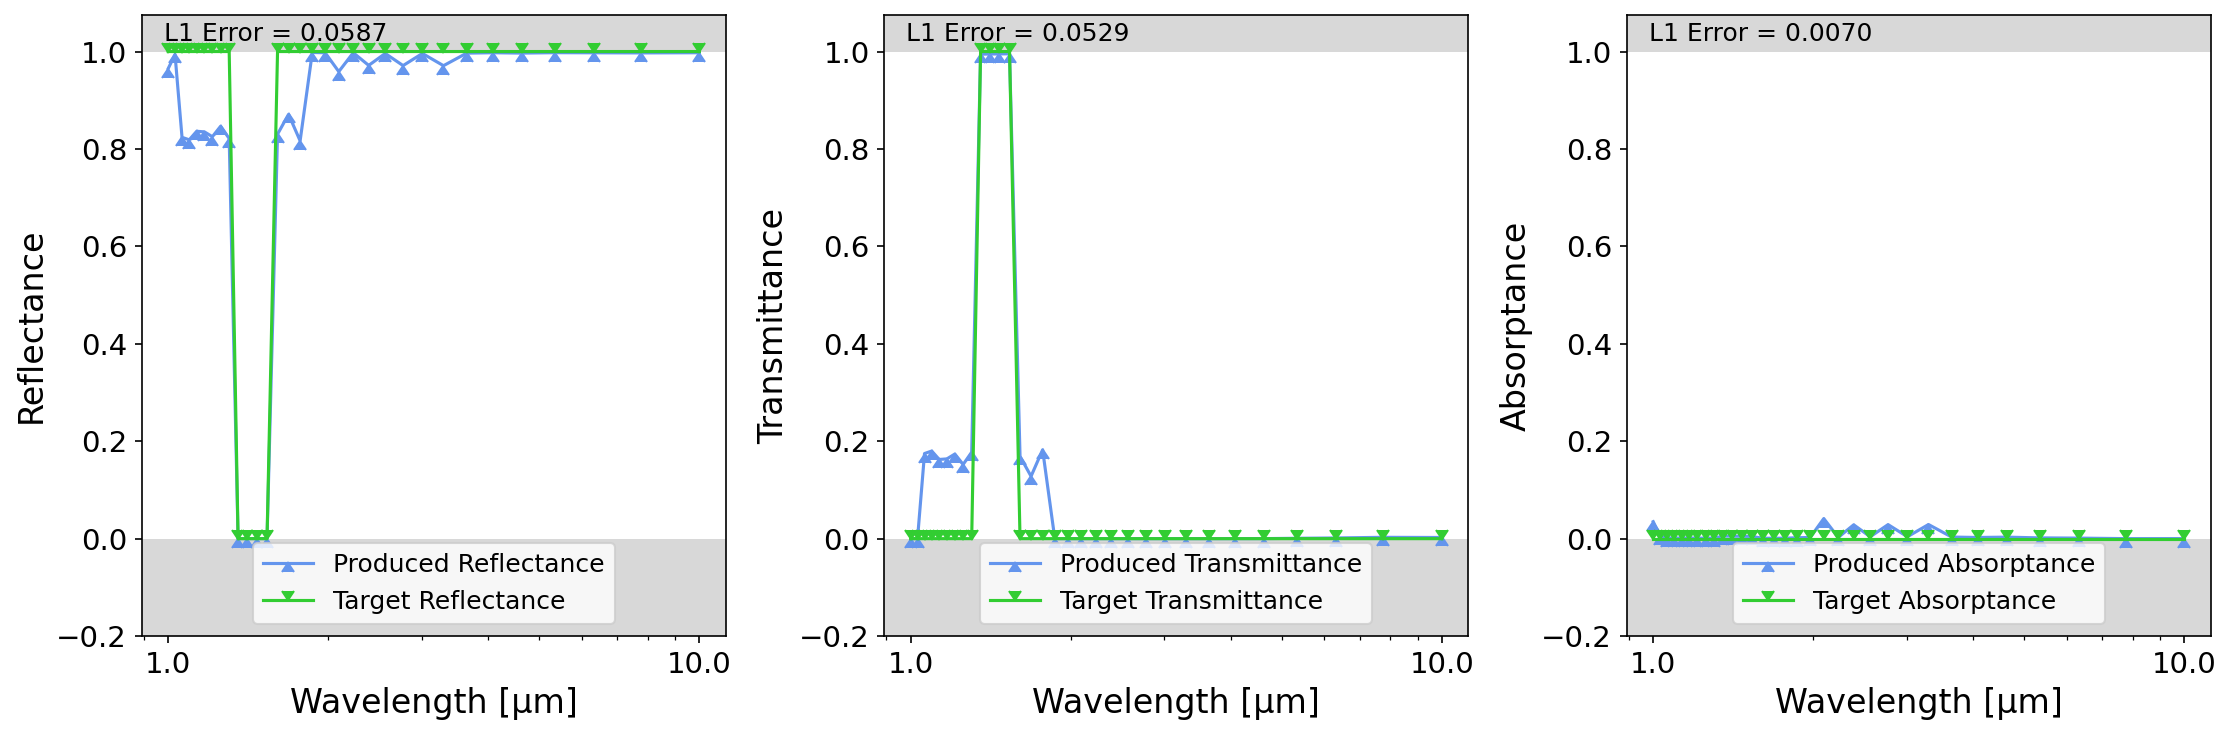

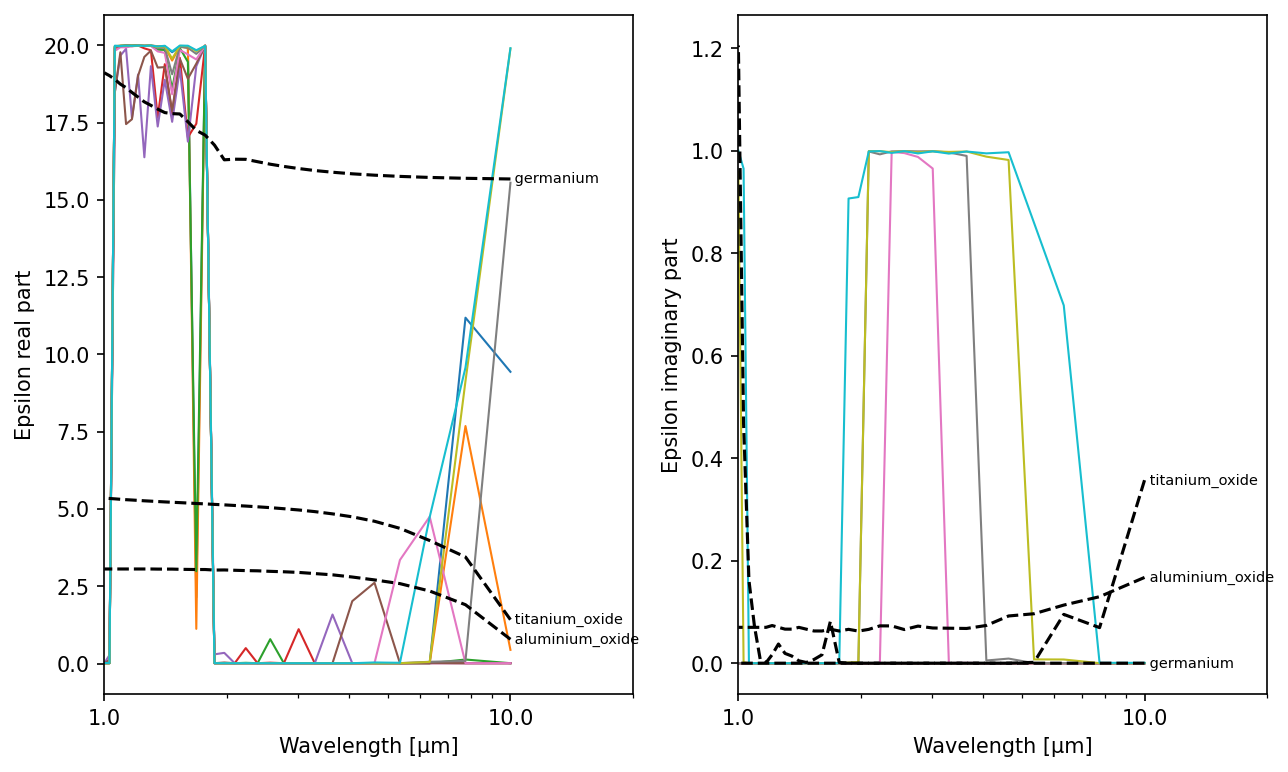

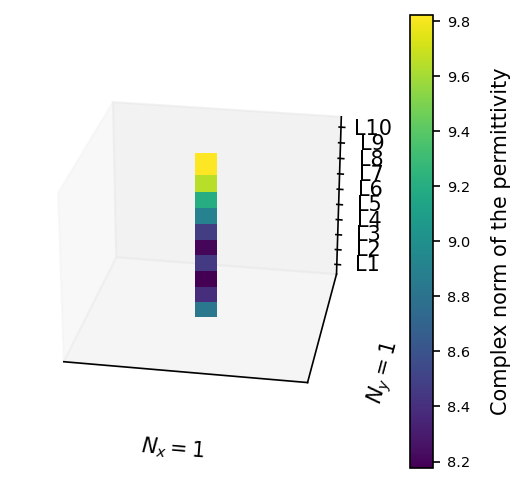

In [12]:
# The other plots
nidn.plot_spectra(cfg)
nidn.plot_eps_per_point(cfg,legend=False)
nidn.plot_model_grid(cfg)

# Classification

In [13]:
cfg.pop("model",None); # Forget the old model

cfg.type = "classification" # Choose type as described above
cfg.iterations = 5000 # Set number of training iterations (that is forward model evaluations) to perform

In [ ]:
nidn.run_training(cfg);

09:20:31|NIDN-INFO| ###  New Best=0.3530 with SpectrumLoss=0.3484 ### L1=0.3484
09:20:31|NIDN-INFO| It=0     Loss=0.3530   |  weighted_avg=0.3530  |  SpectrumLoss=0.3484 | L1=0.3484
09:20:32|NIDN-INFO| ###  New Best=0.3195 with SpectrumLoss=0.3149 ### L1=0.3149
09:20:33|NIDN-INFO| ###  New Best=0.2913 with SpectrumLoss=0.2868 ### L1=0.2868
09:20:33|NIDN-INFO| ###  New Best=0.2719 with SpectrumLoss=0.2675 ### L1=0.2675
09:20:34|NIDN-INFO| ###  New Best=0.2595 with SpectrumLoss=0.2556 ### L1=0.2556
09:20:35|NIDN-INFO| ###  New Best=0.2519 with SpectrumLoss=0.2485 ### L1=0.2485
09:20:35|NIDN-INFO| It=5     Loss=0.2519   |  weighted_avg=0.2912  |  SpectrumLoss=0.2485 | L1=0.2485
09:20:36|NIDN-INFO| ###  New Best=0.2471 with SpectrumLoss=0.2443 ### L1=0.2443
09:20:37|NIDN-INFO| ###  New Best=0.2440 with SpectrumLoss=0.2418 ### L1=0.2418
09:20:37|NIDN-INFO| ###  New Best=0.2420 with SpectrumLoss=0.2402 ### L1=0.2402
09:20:38|NIDN-INFO| ###  New Best=0.2406 with SpectrumLoss=0.2391 ### L1=0.2

09:21:19|NIDN-INFO| ###  New Best=0.2361 with SpectrumLoss=0.2360 ### L1=0.2360
09:21:20|NIDN-INFO| ###  New Best=0.2361 with SpectrumLoss=0.2360 ### L1=0.2360
09:21:21|NIDN-INFO| ###  New Best=0.2361 with SpectrumLoss=0.2360 ### L1=0.2360
09:21:21|NIDN-INFO| ###  New Best=0.2361 with SpectrumLoss=0.2360 ### L1=0.2360
09:21:21|NIDN-INFO| It=65    Loss=0.2361   |  weighted_avg=0.2361  |  SpectrumLoss=0.2360 | L1=0.2360
09:21:22|NIDN-INFO| ###  New Best=0.2361 with SpectrumLoss=0.2360 ### L1=0.2360
09:21:23|NIDN-INFO| ###  New Best=0.2361 with SpectrumLoss=0.2360 ### L1=0.2360
09:21:24|NIDN-INFO| ###  New Best=0.2361 with SpectrumLoss=0.2360 ### L1=0.2360
09:21:25|NIDN-INFO| ###  New Best=0.2361 with SpectrumLoss=0.2360 ### L1=0.2360
09:21:25|NIDN-INFO| ###  New Best=0.2361 with SpectrumLoss=0.2360 ### L1=0.2360
09:21:25|NIDN-INFO| It=70    Loss=0.2361   |  weighted_avg=0.2361  |  SpectrumLoss=0.2360 | L1=0.2360
09:21:26|NIDN-INFO| ###  New Best=0.2361 with SpectrumLoss=0.2360 ### L1=0.2

09:22:08|NIDN-INFO| ###  New Best=0.2360 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:08|NIDN-INFO| It=125   Loss=0.2360   |  weighted_avg=0.2360  |  SpectrumLoss=0.2359 | L1=0.2359
09:22:08|NIDN-INFO| ###  New Best=0.2360 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:09|NIDN-INFO| ###  New Best=0.2360 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:10|NIDN-INFO| ###  New Best=0.2360 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:11|NIDN-INFO| ###  New Best=0.2360 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:11|NIDN-INFO| ###  New Best=0.2360 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:12|NIDN-INFO| It=130   Loss=0.2360   |  weighted_avg=0.2360  |  SpectrumLoss=0.2359 | L1=0.2359
09:22:12|NIDN-INFO| ###  New Best=0.2360 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:13|NIDN-INFO| ###  New Best=0.2360 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:14|NIDN-INFO| ###  New Best=0.2360 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:15|NIDN-INFO| ###  New Best=0.2360 with SpectrumLoss=0.2359 ### L1=0.2

09:22:57|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:58|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:58|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:59|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:22:59|NIDN-INFO| It=190   Loss=0.2359   |  weighted_avg=0.2359  |  SpectrumLoss=0.2359 | L1=0.2359
09:23:00|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:01|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:02|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:03|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:04|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:04|NIDN-INFO| It=195   Loss=0.2359   |  weighted_avg=0.2359  |  SpectrumLoss=0.2359 | L1=0.2359
09:23:04|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2

09:23:47|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:47|NIDN-INFO| It=250   Loss=0.2359   |  weighted_avg=0.2359  |  SpectrumLoss=0.2359 | L1=0.2359
09:23:48|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:48|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:49|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:50|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:51|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:51|NIDN-INFO| It=255   Loss=0.2359   |  weighted_avg=0.2359  |  SpectrumLoss=0.2359 | L1=0.2359
09:23:51|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:52|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:53|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2359
09:23:54|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2359 ### L1=0.2

09:24:35|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2358 ### L1=0.2358
09:24:36|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2358 ### L1=0.2358
09:24:37|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2358 ### L1=0.2358
09:24:38|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2358 ### L1=0.2358
09:24:38|NIDN-INFO| It=315   Loss=0.2359   |  weighted_avg=0.2359  |  SpectrumLoss=0.2358 | L1=0.2358
09:24:39|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2358 ### L1=0.2358
09:24:39|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2358 ### L1=0.2358
09:24:40|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2358 ### L1=0.2358
09:24:41|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2358 ### L1=0.2358
09:24:42|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2358 ### L1=0.2358
09:24:42|NIDN-INFO| It=320   Loss=0.2359   |  weighted_avg=0.2359  |  SpectrumLoss=0.2358 | L1=0.2358
09:24:42|NIDN-INFO| ###  New Best=0.2359 with SpectrumLoss=0.2358 ### L1=0.2

09:25:25|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:25:25|NIDN-INFO| It=375   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:25:26|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:25:26|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:25:27|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:25:28|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:25:29|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:25:29|NIDN-INFO| It=380   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:25:29|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:25:30|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:25:31|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:25:32|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:26:13|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:26:14|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:26:15|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:26:15|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:26:15|NIDN-INFO| It=440   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:26:16|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:26:17|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:26:18|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:26:18|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:26:19|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:26:19|NIDN-INFO| It=445   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:26:20|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:27:03|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:03|NIDN-INFO| It=500   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:27:03|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:04|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:05|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:06|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:07|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:07|NIDN-INFO| It=505   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:27:07|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:08|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:09|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:10|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:27:51|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:52|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:52|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:53|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:53|NIDN-INFO| It=565   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:27:54|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:55|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:56|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:56|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:57|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:27:57|NIDN-INFO| It=570   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:27:58|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:28:40|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:28:40|NIDN-INFO| It=625   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:28:41|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:28:41|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:28:42|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:28:43|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:28:44|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:28:44|NIDN-INFO| It=630   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:28:44|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:28:45|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:28:46|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:28:47|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:29:28|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:29:29|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:29:30|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:29:30|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:29:30|NIDN-INFO| It=690   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:29:31|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:29:32|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:29:33|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:29:34|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:29:34|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:29:34|NIDN-INFO| It=695   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:29:35|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:30:17|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:30:17|NIDN-INFO| It=750   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:30:18|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:30:19|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:30:19|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:30:20|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:30:21|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:30:21|NIDN-INFO| It=755   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:30:22|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:30:23|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:30:23|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:30:24|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:31:06|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:06|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:07|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:08|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:08|NIDN-INFO| It=815   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:31:09|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:09|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:10|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:11|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:12|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:12|NIDN-INFO| It=820   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:31:13|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:31:54|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:54|NIDN-INFO| It=875   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:31:55|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:56|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:57|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:58|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:58|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:31:58|NIDN-INFO| It=880   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:31:59|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:32:00|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:32:01|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:32:01|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:32:43|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:32:44|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:32:44|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:32:45|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:32:45|NIDN-INFO| It=940   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:32:46|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:32:47|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:32:48|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:32:48|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:32:49|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:32:49|NIDN-INFO| It=945   Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:32:50|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:33:32|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:33:32|NIDN-INFO| It=1000  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:33:33|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:33:34|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:33:34|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:33:35|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:33:36|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:33:36|NIDN-INFO| It=1005  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:33:37|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:33:37|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:33:38|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:33:39|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:34:20|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:34:21|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:34:22|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:34:22|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:34:22|NIDN-INFO| It=1065  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:34:23|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:34:24|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:34:25|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:34:26|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:34:26|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:34:26|NIDN-INFO| It=1070  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:34:27|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:35:10|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:35:10|NIDN-INFO| It=1125  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:35:11|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:35:11|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:35:12|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:35:13|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:35:14|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:35:14|NIDN-INFO| It=1130  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:35:14|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:35:15|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:35:16|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:35:17|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:35:58|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:35:59|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:00|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:01|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:01|NIDN-INFO| It=1190  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:36:02|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:02|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:03|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:04|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:05|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:05|NIDN-INFO| It=1195  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:36:06|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:36:48|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:48|NIDN-INFO| It=1250  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:36:48|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:49|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:50|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:51|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:51|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:51|NIDN-INFO| It=1255  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:36:52|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:53|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:54|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:36:55|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:37:37|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:37|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:38|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:39|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:39|NIDN-INFO| It=1315  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:37:40|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:40|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:41|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:42|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:43|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:43|NIDN-INFO| It=1320  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:37:44|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

Epoch  1330: reducing learning rate of group 0 to 5.2800e-05.


09:37:51|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:51|NIDN-INFO| It=1330  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:37:51|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:52|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:53|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:54|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:54|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:54|NIDN-INFO| It=1335  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:37:55|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:56|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:57|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:37:57|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:38:40|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:38:41|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:38:41|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:38:42|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:38:42|NIDN-INFO| It=1395  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:38:43|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:38:44|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:38:44|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:38:45|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:38:46|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:38:46|NIDN-INFO| It=1400  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:38:47|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:39:29|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:39:29|NIDN-INFO| It=1455  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:39:30|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:39:31|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:39:32|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:39:32|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:39:33|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:39:33|NIDN-INFO| It=1460  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:39:34|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:39:35|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:39:35|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:39:36|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:40:18|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:40:19|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:40:20|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:40:21|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:40:21|NIDN-INFO| It=1520  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:40:21|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:40:22|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:40:23|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:40:24|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:40:24|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:40:24|NIDN-INFO| It=1525  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:40:25|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:41:08|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:08|NIDN-INFO| It=1580  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:41:08|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:09|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:10|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:11|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:12|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:12|NIDN-INFO| It=1585  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:41:12|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:13|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:14|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:15|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:41:56|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:57|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:57|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:58|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:41:58|NIDN-INFO| It=1645  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:41:59|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:00|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:01|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:01|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:02|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:02|NIDN-INFO| It=1650  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:42:03|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:42:45|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:45|NIDN-INFO| It=1705  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:42:46|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:47|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:48|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:49|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:49|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:49|NIDN-INFO| It=1710  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:42:50|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:51|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:52|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:42:53|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:43:35|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:43:35|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:43:36|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:43:37|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:43:37|NIDN-INFO| It=1770  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:43:38|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:43:39|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:43:39|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:43:40|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:43:41|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:43:41|NIDN-INFO| It=1775  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:43:42|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:44:24|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:44:24|NIDN-INFO| It=1830  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358


Epoch  1831: reducing learning rate of group 0 to 3.4848e-05.


09:44:25|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:44:25|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:44:26|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:44:27|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:44:28|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:44:28|NIDN-INFO| It=1835  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:44:29|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:44:29|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:44:30|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:44:31|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:44:32|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:44:32|NIDN-INFO| It=1840  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2

09:45:14|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:45:15|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:45:15|NIDN-INFO| It=1895  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:45:16|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:45:17|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:45:17|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:45:18|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:45:19|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:45:19|NIDN-INFO| It=1900  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:45:20|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:45:21|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:45:21|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:46:03|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:04|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:04|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:05|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:06|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:06|NIDN-INFO| It=1960  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:46:07|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:08|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:08|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:09|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:10|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:10|NIDN-INFO| It=1965  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2

09:46:53|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:54|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:54|NIDN-INFO| It=2020  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:46:55|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:55|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:56|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:57|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:58|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:58|NIDN-INFO| It=2025  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:46:58|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:46:59|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:47:00|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:47:42|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:47:42|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:47:43|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:47:44|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:47:45|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:47:45|NIDN-INFO| It=2085  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:47:46|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:47:46|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:47:47|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:47:48|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:47:49|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:47:49|NIDN-INFO| It=2090  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2

09:48:31|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:48:32|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:48:32|NIDN-INFO| It=2145  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:48:32|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:48:33|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:48:34|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:48:35|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:48:36|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:48:36|NIDN-INFO| It=2150  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:48:36|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:48:37|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:48:38|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

09:49:20|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:49:21|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:49:22|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:49:23|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:49:24|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:49:24|NIDN-INFO| It=2210  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:49:24|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:49:25|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:49:26|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:49:27|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:49:27|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:49:27|NIDN-INFO| It=2215  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2

09:50:10|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:50:10|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:50:10|NIDN-INFO| It=2270  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:50:11|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:50:12|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:50:13|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:50:14|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:50:14|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:50:14|NIDN-INFO| It=2275  Loss=0.2358   |  weighted_avg=0.2358  |  SpectrumLoss=0.2358 | L1=0.2358
09:50:15|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:50:16|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
09:50:17|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2

In [ ]:
# The other plots
nidn.plot_spectra(cfg)
nidn.plot_eps_per_point(cfg,legend=False)
nidn.plot_model_grid(cfg)

In [ ]:
# In case you want to save results you can use this handy function
# to save it to the results folder with a current timestamp
nidn.save_run(cfg)

# You can save all available plots to a single folder using this function
nidn.save_all_plots(cfg,save_path="/results/example/")